Dentro de vs_release_16k.zip descomprimimos dos carpetas:  
- audio_16k  
- meta  

Nos servimos del módulo zipfile para descomprimir y adicionalmente del módulo concurrent para utilizar threads agilizando la descompresión.  
https://superfastpython.com/multithreaded-unzip-files/#Unzip_Files_Concurrently_with_Processes

In [6]:
import os
from zipfile import ZipFile
from concurrent.futures import ThreadPoolExecutor

def unzip_file(handle, filename, path):
    # unzip the file
    handle.extract(filename, path)
    # report progress
    print(f'.unzipped {filename}')

output_dir = "data"
zip_file_name = "vs_release_16k.zip"
dir_to_extract = ["audio_16k", "meta"]

if not os.path.exists(output_dir):
    try:
        with ZipFile(zip_file_name, 'r') as handle:
            # start the thread pool
            with ThreadPoolExecutor() as exe:
                # unzip selected_folders from the archive
                _ = []
                for file in handle.namelist():
                    if any(file.startswith(dir) for dir in dir_to_extract):
                        _.append(exe.submit(unzip_file, handle, file, output_dir))
    except:
        raise FileNotFoundError

.unzipped audio_16k/f1236_0_sigh.wav
.unzipped audio_16k/m1679_0_sniff.wav
.unzipped audio_16k/m1783_0_throatclearing.wav
.unzipped audio_16k/f1284_0_laughter.wav
.unzipped audio_16k/f1291_0_laughter.wav
.unzipped audio_16k/m1037_0_sigh.wav
.unzipped audio_16k/m0209_0_sneeze.wav
.unzipped audio_16k/m1329_0_sniff.wav
.unzipped audio_16k/m0019_0_cough.wav
.unzipped audio_16k/m2536_0_laughter.wav
.unzipped audio_16k/f2769_0_laughter.wav
.unzipped audio_16k/f0998_0_laughter.wav
.unzipped audio_16k/f2769_0_sniff.wav
.unzipped audio_16k/f2899_0_sniff.wav
.unzipped audio_16k/f1216_0_sneeze.wav
.unzipped audio_16k/f1941_1_sneeze.wav
.unzipped audio_16k/m1528_0_sigh.wav
.unzipped audio_16k/f1956_2_sneeze.wav
.unzipped audio_16k/f2985_0_throatclearing.wav
.unzipped audio_16k/f0716_0_sneeze.wav
.unzipped audio_16k/m2523_0_laughter.wav
.unzipped audio_16k/m1794_0_cough.wav
.unzipped audio_16k/f0743_0_sneeze.wav
.unzipped audio_16k/m1770_0_throatclearing.wav
.unzipped audio_16k/m3123_0_cough.wav
.u

Ahora pasamos los datos a numpy arrays para poder trabajar con ellos:
Para ello vamos a usar multiprocessing, utilizamos una pool de cores para leer nuestros archivos.

In [1]:
import multiprocessing
multiprocessing.cpu_count()

12

In [3]:
import os
import wave
import numpy as np
import threading

def read_wav_file(wav_file):
    with wave.open(wav_file, 'rb') as wf:
        num_frames = wf.getnframes()
        frames = wf.readframes(num_frames)
        wave_array = np.frombuffer(frames, dtype=np.int16)
        wave_name = os.path.basename(wav_file)
        wave_name = os.path.splitext(wave_name)[0]
        print(f"{wave_name} loaded ...")
    return wave_name, wave_array

def run_threads(task, data):
    threads = []
    results = []
    for d in data:
        thread = threading.Thread(target=task, args=(d, results))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    return results

def process_file(wav_file, results):
    result = read_wav_file(wav_file)
    results.append(result)

base_dir = "data"
dir = "audio_16k"

audio_dir = os.path.join(base_dir, dir)
audios = os.listdir(audio_dir)
audio_paths = [os.path.join(audio_dir, file) for file in audios]
results = run_threads(task=process_file, data=audio_paths)
print(results[0])


f0003_0_laughter loaded ...f0003_0_cough loaded ...

f0003_0_sigh loaded ...
f0003_0_sneeze loaded ...
f0003_0_sniff loaded ...
f0003_0_throatclearing loaded ...
f0004_0_cough loaded ...
f0004_0_laughter loaded ...
f0004_0_sigh loaded ...
f0004_0_sneeze loaded ...
f0004_0_throatclearing loaded ...
f0007_0_cough loaded ...
f0004_0_sniff loaded ...
f0007_0_sigh loaded ...
f0007_0_laughter loaded ...
f0007_0_sneeze loaded ...
f0007_0_sniff loaded ...
f0007_0_throatclearing loaded ...
f0008_0_cough loaded ...
f0008_0_laughter loaded ...
f0008_0_sigh loaded ...
f0008_0_sneeze loaded ...
f0008_0_sniff loaded ...
f0008_0_throatclearing loaded ...
f0010_0_cough loaded ...
f0010_0_laughter loaded ...
f0010_0_sigh loaded ...
f0010_0_sneeze loaded ...
f0010_0_throatclearing loaded ...
f0010_0_sniff loaded ...
f0015_0_cough loaded ...
f0015_0_laughter loaded ...
f0015_0_sigh loaded ...
f0015_0_sneeze loaded ...
f0015_0_sniff loaded ...
f0015_0_throatclearing loaded ...
f0017_0_cough loaded ...
f00

audio_16k contiene los audios en formato .wav

m0188_0_cough.wav  
m -> male  
cough -> cough  
0 -> index of that cough (individuals may have more than 1 cough registered)

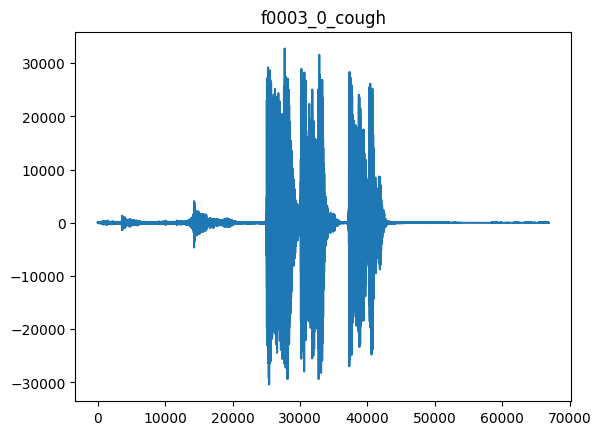

In [5]:
import matplotlib.pyplot as plt
name, arr = results[0]
plt.plot(arr)
plt.title(name)
plt.show()

In [7]:
from scipy.io import wavfile

sampling_rate, audio_data = wavfile.read(example)
sampling_rate, audio_data

(16000, array([38, 53, 50, ..., 19, 16,  9], dtype=int16))